[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
11821
Epoch 1/5
34/34 [==============================] - 4s 103ms/step - loss: 2.2550 - acc: 0.4871 - val_loss: 0.7283 - val_acc: 0.8685
Epoch 2/5
34/34 [==============================] - 3s 99ms/step - loss: 0.4166 - acc: 0.9437 - val_loss: 0.4525 - val_acc: 0.9039
Epoch 3/5
34/34 [==============================] - 3s 98ms/step - loss: 0.1754 - acc: 0.9836 - val_loss: 0.3871 - val_acc: 0.9106
Epoch 4/5
34/34 [==============================] - 3s 98ms/step - loss: 0.0891 - acc: 0.9964 - val_loss: 0.3592 - val_acc: 0.9127
Epoch 5/5
34/34 [==============================] - 3s 99ms/step - loss: 0.0541 - acc: 0.9982 - val_loss: 0.3465 - val_acc: 0.9173


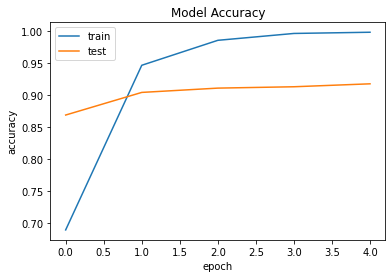

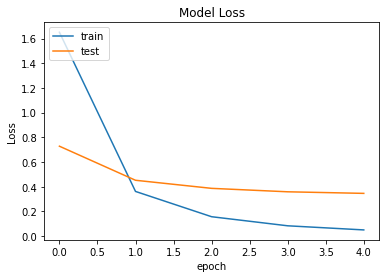

Actual value=4    Predicted value=4


In [5]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten, Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)
sentences = newsgroups_train.data
y = newsgroups_train.target

print(np.unique(y))


max_review_len = max([len(s.split()) for s in sentences])

#tokenizing data
tokenizer = Tokenizer(num_words=max_review_len)
tokenizer.fit_on_texts(sentences)

#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

input_dim = max_review_len
print(input_dim)



#print(sentences)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)


# Number of features
# print(input_dim)
model = Sequential()
model.add(layers.Dense(300, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

# Plotting the accuracy using history object
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting the Loss using history object
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

predictedmodel = model.predict(X_test[10].reshape(1, 11821))
print("Actual value=" + str(y_test[10]) + "    Predicted value=" + str(predictedmodel.argmax()))